<a href="https://colab.research.google.com/github/wenshanliu653/Udemy_Tensorflow_ML/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-01-23 05:03:32.026132


# **Creating data to view and fit**
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

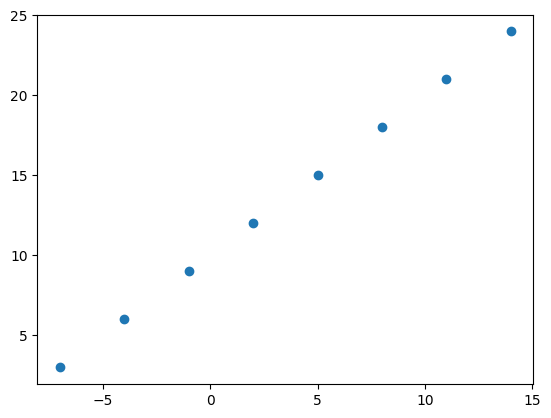

In [47]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21,24.0])

#Visulize
plt.scatter(X,y)

In [48]:
#Relation of X and y

y == X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

# **Regression input shapes and output shapes**

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [49]:
#Example input and output shape of a regression model

house_info =tf.constant(["bedroom", "bathroon", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroon', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [50]:
house_info.shape #house_info 的shape

TensorShape([3])

In [51]:
house_price.shape #house_price 的shape

TensorShape([1])

In [52]:
input_shape = house_info.shape
output_shape = house_price.shape

input_shape, output_shape # these are both scalars (no shape)


(TensorShape([3]), TensorShape([1]))

In [53]:

# Take a single example of X
input_shape = X[0].shape  #如果只放單一element.shape, 則不會有張量輸出

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

# **Steps in modelling with TensorFlow**
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - define the input and output layer, as well as the hidden layers of a deep learning model.

**2.Compiling a model**- defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y). (feautures and labels)

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

In [54]:
#Set random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model = tf.keras.Sequential( #序列模型（Sequential） 序列模型各层之间是依次顺序的线性关系，模型结构通过一个列表来制定 或者逐层添加网络结构
    [tf.keras.layers.Dense(1)]
)

#Compile the model
model.compile(loss = tf.keras.losses.mae,  #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic grandient desecent
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1),y ,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 981ms/step - loss: 15.6852 - mae: 15.6852
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 15.4040 - mae: 15.4040
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 15.1227 - mae: 15.1227
Epoch 4/5
1/1 [==============================] - 0s 25ms/step - loss: 14.8831 - mae: 14.8831
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 14.7506 - mae: 14.7506


In [55]:
#Check X, y

X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [56]:
#Make a preditction with the model
model.predict([17.0]) #當X=17時 y 應該要約27 , 但答案只有２５


1/1 [==============================] - 0s 147ms/step


array([[-5.594603]], dtype=float32)

# **Improve our model**

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


In [57]:
#renbuild the model

#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]
)

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#Fit the model
model.fit(tf.expand_dims(X , axis = -1) ,y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 745ms/step - loss: 18.5172 - mae: 18.5172
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 18.2359 - mae: 18.2359
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 17.9547 - mae: 17.9547
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 17.6734 - mae: 17.6734
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 17.3922 - mae: 17.3922
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 17.1109 - mae: 17.1109
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 16.8297 - mae: 16.8297
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 16.5484 - mae: 16.5484
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 16.2672 - mae: 16.2672
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 15.9859 - mae: 15.9859
Epoch 11/100
1/1 [==============================

In [60]:
#Remind ourselves of the data
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [61]:
#Our model's predit
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 85ms/step


array([[29.225279]], dtype=float32)

# **Improve our model2**

Comman ways to improve the model:
- Adding layers
- Increase the numbers of hidden units
- Change the activation functions
- Change the optimization function
- Change the learning rate
- fitting on more data
- fitting for longer

In [62]:
 #create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),  #actibation function ->Example: Sigmoid function
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),# 3 hidden layers, 100 hidden units
    tf.keras.layers.Dense(1)
])

#Complile the model

model.compile(loss = tf.keras.losses.mae,
               #optimizer = tf.keras.optimizers.SGD(lr =0.01),
              optimizer = tf.keras.optimizers.Adam(lr =0.01),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X , axis = -1), y, epochs = 100) #epochs=100 -> fitting for longer

Epoch 1/100
1/1 [==============================] - 1s 977ms/step - loss: 13.2116 - mae: 13.2116
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8860 - mae: 12.8860
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5625 - mae: 12.5625
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2352 - mae: 12.2352
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9214 - mae: 11.9214
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6090 - mae: 11.6090
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 11.3018 - mae: 11.3018
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9878 - mae: 10.9878
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6636 - mae: 10.6636
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3724 - mae: 10.3724
Epoch 11/100
1/1 [==============================

In [63]:
#Remider our data
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [64]:
#Predict
model.predict([17.0]) #should be 27, but it comes to 30.81, even though mae and loss lower than before.

1/1 [==============================] - 0s 158ms/step


array([[31.192343]], dtype=float32)

#Evaluating a tensorflow data

A typical workflow you'll go through when building neural networking is:
  ```
  building the model -> evalute it -> tweak it(調整)  -> evalute it -> tweak it(調整) -> evalute it -> tweak it(調整)
  ```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.


When it comes to evaluation, you'll want to remember the words:

**"visualize, visualize, visualize."**

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:


The data - what data are you working with? What does it look like?

The model itself - what does the architecture look like? What are the different shapes?

The training of a model - how does a model perform while it learns?

The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?




Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [73]:
 #make the bigger dataset

X= np.arange(-100,100,4)
X


array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [74]:
# Make the labels for the datasets
y =np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [75]:
#Same result as above
y= X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

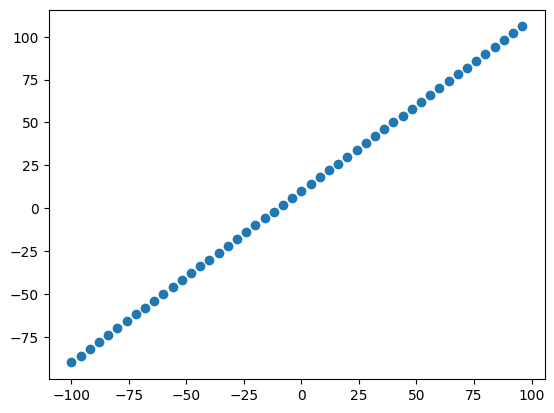

In [77]:
#Visulize the data

import matplotlib.pyplot as plt

#plt.plot(X,y)
plt.scatter(X,y)

# The 3 Sets...

**Split data into training/test set**

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).

Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).

Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.


In [79]:
#Check how many samples we have
len(X)

50

In [80]:
#Spilt data into train and test datasets
X_train = X[:40] #the first 40 examples
y_train = y[:40]


X_test = X[40:] #the last 10 examples
y_test = y[40:]

len(X_train), len(X_test)


(40, 10)

# **Visualizing the data**

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

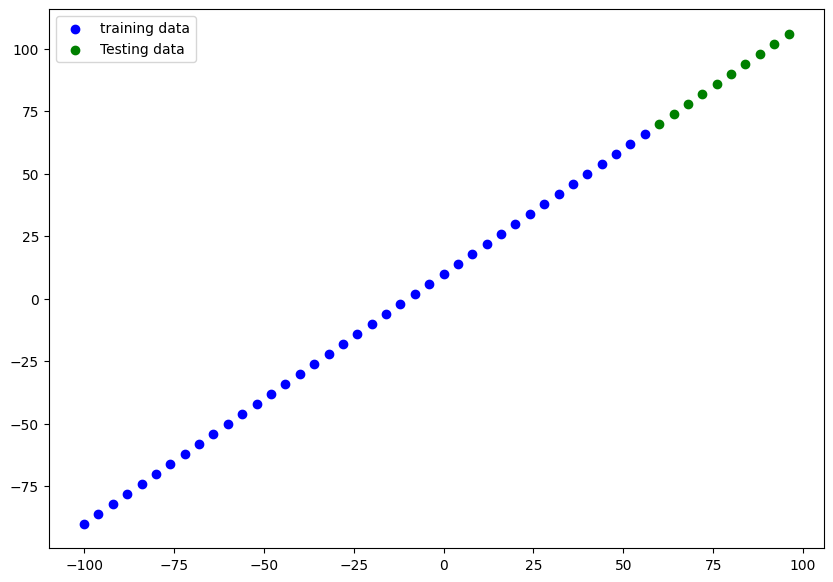

In [81]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train, y_train, c= 'b', label = 'training data')
#plot testing data in green
plt.scatter(X_test, y_test, c= 'g', label = 'Testing data')

plt.legend();

Time to build the model

In [90]:
# Set the random seed
tf.random.set_seed(42)

#Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])


#Compile the model
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])
#Fit the model
#model.fit(tf.expand_dims(X , axis = -1), y, epochs=100)

In [91]:

# Doesn't work (model not fit/built) #因為沒有build()或是 fit() model
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [102]:
#如果用build() 需要提供input_shape 參數,此參數可以在Create model 時定義
#例如：

#Set the random seeds
tf.random.set_seed(42)

#Create the model
model= tf.keras.Sequential([
   # tf.keras.layers.Dense(1,input_shape=[1])
   #tf.keras.layers.Dense(2,input_shape=[1]) # paramenters:2, dense:2 -> total params:4
  tf.keras.layers.Dense(3,input_shape=[1])  # paramenters:2, dense:3 -> total params:6
])

#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



In [103]:
#model summary

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
[https://www.youtube.com/watch?v=njKP3FqW3Sk](https://)



🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [105]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 8.1707 - mae: 8.1707
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 7.3437 - mae: 7.3437
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4998 - mae: 8.4998
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6276 - mae: 7.6276
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7717 - mae: 7.7717
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 7.2750 - mae: 7.2750
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7193 - mae: 7.7193
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.3944 - mae: 7.3944
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4750 - mae: 8.4750
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 8.3014 - mae: 8.3014
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5510